In [4]:
import keras
from keras.datasets import cifar10
from keras import backend as K
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
from keras.layers import concatenate,Dropout,Flatten
import numpy as np
from keras import optimizers,regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import he_normal
from keras.callbacks import LearningRateScheduler, TensorBoard, ModelCheckpoint


In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

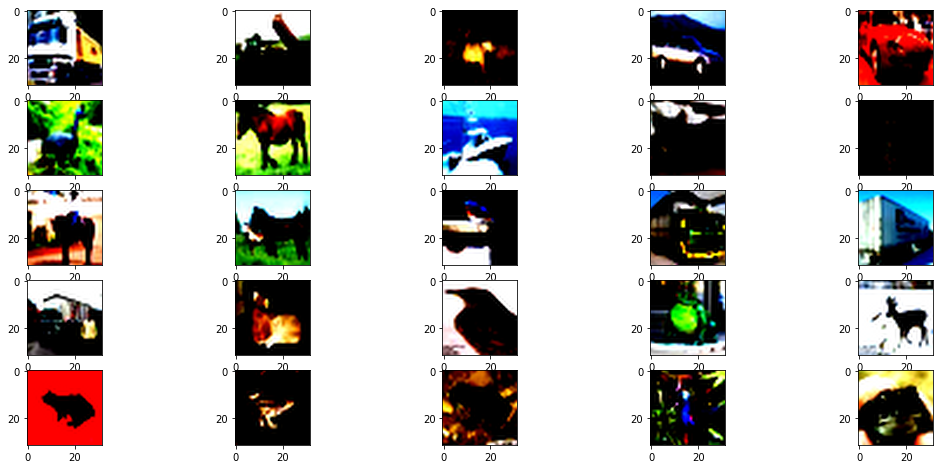

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], interpolation='lanczos')

In [17]:
def alexnet(img_input,classes=10):
    xnet = Conv2D(96,(11,11),strides=(4,4),padding='same',
               activation='relu',kernel_initializer='uniform')(img_input)
    xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
    
    xnet = Conv2D(256,(5,5),strides=(1,1),padding='same',
               activation='relu',kernel_initializer='uniform')(xnet)
    xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
    
    xnet = Conv2D(384,(3,3),strides=(1,1),padding='same',
               activation='relu',kernel_initializer='uniform')(xnet) 
    
    xnet = Conv2D(384,(3,3),strides=(1,1),padding='same',
               activation='relu',kernel_initializer='uniform')(xnet) 
    
    xnet = Conv2D(256,(3,3),strides=(1,1),padding='same',
               activation='relu',kernel_initializer='uniform')(xnet)
    xnet = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(xnet)
    xnet = Flatten()(xnet)
    xnet = Dense(4096,activation='relu')(xnet)
    xnet = Dropout(0.25)(xnet)
    xnet = Dense(4096,activation='relu')(xnet)
    xnet = Dropout(0.25)(xnet)
    out_model = Dense(classes, activation='softmax')(xnet)
    return out_model

In [18]:
img_input=Input(shape=(32,32,3))
output = alexnet(img_input)
model=Model(img_input,output)
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 384)        

In [24]:
sgd = optimizers.SGD(lr=.01, momentum=0.8, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# set callback
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
epochs = 10
batch_size=256
# set data augmentation
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.115,
                             height_shift_range=0.115,
                             fill_mode='constant',cval=0.)
datagen.fit(x_train)

# start training
Alex=model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                    
                    epochs=epochs,
                    callbacks=callbacks_list,
                    validation_data=(x_test, y_test))


Epoch 1/10
196/196 [==============================] - 882s 4s/step - loss: 1.7968 - accuracy: 0.3358 - val_loss: 1.6067 - val_accuracy: 0.4103
Epoch 2/10
196/196 [==============================] - 633s 3s/step - loss: 1.5633 - accuracy: 0.4335 - val_loss: 1.4183 - val_accuracy: 0.4850
Epoch 3/10
196/196 [==============================] - 677s 3s/step - loss: 1.4463 - accuracy: 0.4794 - val_loss: 1.2982 - val_accuracy: 0.5364
Epoch 4/10
196/196 [==============================] - 664s 3s/step - loss: 1.3554 - accuracy: 0.5139 - val_loss: 1.2721 - val_accuracy: 0.5438
Epoch 5/10
196/196 [==============================] - 631s 3s/step - loss: 1.2869 - accuracy: 0.5406 - val_loss: 1.2323 - val_accuracy: 0.5660
Epoch 6/10
196/196 [==============================] - 627s 3s/step - loss: 1.2361 - accuracy: 0.5609 - val_loss: 1.1211 - val_accuracy: 0.6018
Epoch 7/10
196/196 [==============================] - 749s 4s/step - loss: 1.1812 - accuracy: 0.5794 - val_loss: 1.1318 - val_accuracy: 0.6007

In [25]:
Alex.history

{'accuracy': [0.33577999472618103,
  0.4335399866104126,
  0.47940000891685486,
  0.5138999819755554,
  0.5405600070953369,
  0.5608800053596497,
  0.5793600082397461,
  0.5959200263023376,
  0.60971999168396,
  0.6198599934577942],
 'loss': [1.796757459640503,
  1.5633151531219482,
  1.4463382959365845,
  1.3554412126541138,
  1.286904215812683,
  1.2361472845077515,
  1.1811738014221191,
  1.143071174621582,
  1.1040849685668945,
  1.0710465908050537],
 'val_accuracy': [0.41029998660087585,
  0.48500001430511475,
  0.5364000201225281,
  0.5437999963760376,
  0.5659999847412109,
  0.6018000245094299,
  0.6007000207901001,
  0.6341999769210815,
  0.6258000135421753,
  0.6399999856948853],
 'val_loss': [1.6067266464233398,
  1.4182630777359009,
  1.2981802225112915,
  1.2720937728881836,
  1.2323485612869263,
  1.1211282014846802,
  1.1317763328552246,
  1.0496169328689575,
  1.060517430305481,
  1.0451719760894775]}

Text(0, 0.5, 'acc')

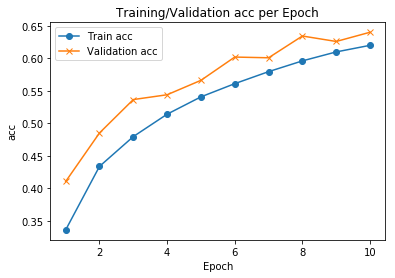

In [27]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

ax.plot([None] + model.history.history['accuracy'], 'o-')
ax.plot([None] + model.history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

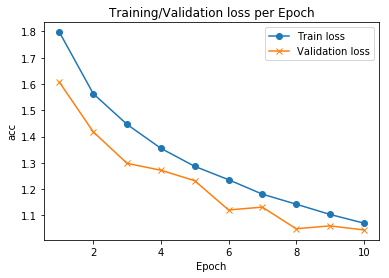

In [28]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + model.history.history['loss'], 'o-')
ax.plot([None] + model.history.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [29]:
predictions = model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np


In [36]:
import numpy as np
rounded_labels=np.argmax(predictions, axis=1)
rounded_labels[1]

8

In [40]:
Y_test_rounded=np.argmax(y_test, axis=1)


8

In [46]:
cm=confusion_matrix(Y_test_rounded, rounded_labels)
confusion_matrix(Y_test_rounded, rounded_labels)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000]],
      dtype=int64)

In [44]:
def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()

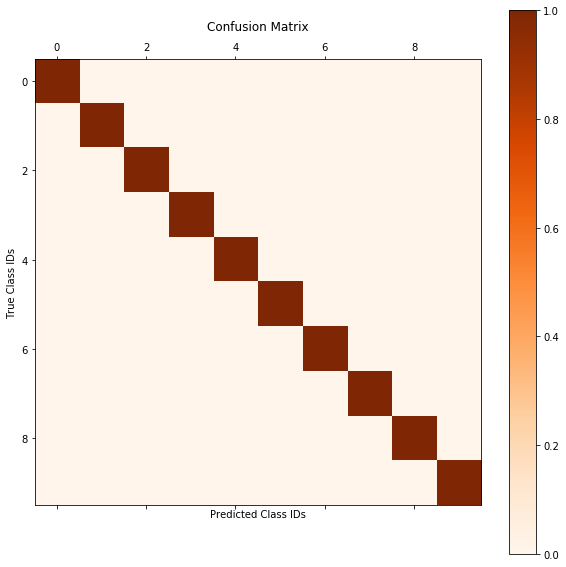

In [47]:
plot_confusion_matrix(cm)